# Regresja liniowa

Naszym Celem jest empityczne sprawdzenie twierdzenia:

Niech $A \in \mathbb{R}^{N\times K}$ będzie macierzą która przekształca $\mathbb{R}^{K}$ w $\mathbb{R}^N$, i niech $y \in \mathbb{R}^{K}$.

Wtedy punkt $x_0 \in \mathbb{R}^K$ spełnia

$$
x_0 = \mathrm{argmin} \{ x \in \mathbb{R}^K   \colon \| Ax - y \|^2 \}
$$

wtedy i tylko wtedy gdy

$$
A^TA x_0 = A^Ty.
$$


In [1]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

Proszę wykres funkcji w kształcie 

$
f(x)=x^2
$ 

na odcinku $[0,3]$ i go narysować.

Będzie to model, który będziemy chcieli znaleźć.

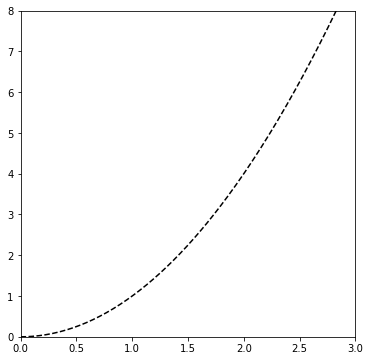

In [2]:
f = lambda x: (x**2)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr[:200], y_tr[:200], '--k');
plt.show()

Proszę wylosować kilka punktów z otoczenia funkcji $f(x)=x^2$.

Na ich podstawie będziemy wykonywać naszej presykcji.

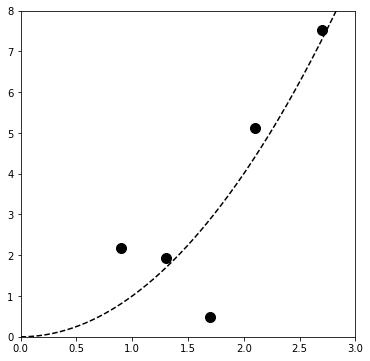

In [3]:
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Nauczmy prosty model regresji liniowej

$$
y=a\cdot x + b
$$

na naszych danych.

Oraz narysujmy prostą regresji.

In [4]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x[:, np.newaxis], y);
print(lr.coef_)
print(lr.intercept_)

[3.28651861]
-2.3681066980250263


Definiujemy naszą funkcję regresji

In [5]:
f_lr = lambda x: lr.coef_ * x +lr.intercept_

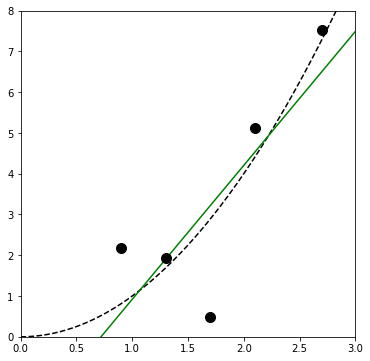

In [6]:
x_f_lr = np.linspace(0., 3, 200)
y_f_lr = f_lr(x_tr)
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.show()

Teraz możemy wykonać predykcję dla punktu 
$$
x_0 = 1.5
$$

In [7]:
point = np.array([1.5])
y_point = lr.predict(point[:, np.newaxis])

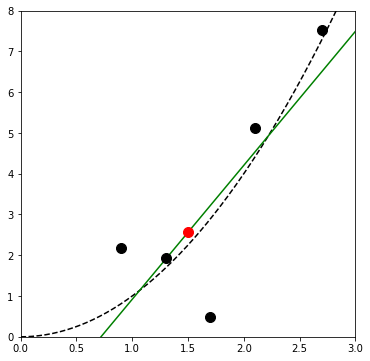

In [8]:
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,8])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x_f_lr, y_f_lr, 'g');
plt.plot(x, y, 'ok', ms=10);
plt.plot(point, y_point, 'or', ms=10);
plt.show()

Możemy wypisać miarę dopasowania $R^2$. Narazie nie wnikamy w to co ona oznacza.

In [9]:
from sklearn.metrics import r2_score
print(lr.score(x[:, np.newaxis], y))
print(r2_score(lr.predict(x[:, np.newaxis]), y))

0.8050615986865475
0.757859023916315


# Zadanie 1
Stwórz macierz postaci:
$$
A=\begin{bmatrix}
x_1 & 1\\
\ddots & \ddots\\
x_n & 1\\
\end{bmatrix}
$$

i rozwiąż równanie

$$
A^TA x = A^Ty.
$$

gdzie (x,y) to nasz zbiór treningowy. 

Użyj funkcji <tt>linalg.solve</tt>.

In [10]:
deg=1
A=np.vander(x, deg + 1)
A

array([[0.2, 1. ],
       [0.5, 1. ],
       [0.8, 1. ],
       [0.9, 1. ],
       [1.3, 1. ],
       [1.7, 1. ],
       [2.1, 1. ],
       [2.7, 1. ]])

In [11]:
np.linalg.solve(A.T @ A, A.T @ y)

array([ 3.28651861, -2.3681067 ])

# Zadanie 2
Zapoznaj się z funkcją <tt>optimize.fmin_cg</tt>
https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.optimize.fmin_cg.html
i znajdż minum funkcji

$$
f(x,y) = (x+1)^2+y^2
$$

In [12]:
from scipy import optimize

def squares(pair):
    x,y = pair
    return (x+1)**2 + y**2

optimize.fmin_cg(squares, x0=[(100,100)])

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 27
         Gradient evaluations: 9


array([-9.99999996e-01,  3.67567063e-09])

# Zadanie 3
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error}(a,b;(x,y)) =  \sum_{i=1}^{n} ( y_i - (ax_i+b) )^2.
$$

In [13]:
import numpy as np
def compute_error(ab, xy):
    a, b = ab
    x, y = xy
    return sum([(yi - (a*xi + b))**2 for xi, yi in zip(x, y)])
    
x = np.array([0, 1, 2])
y = np.array([-2, -3, -4])

compute_error((0, 1), (x,y))

50

# Zadanie 4
Zminimalizuj funkcją $\mathrm{compute\_error}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [14]:
from functools import partial
fun = partial(compute_error, xy=(x,y))
optimize.fmin_cg(fun, x0=(0, 1))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 2
         Function evaluations: 15
         Gradient evaluations: 5


array([-1.00000013, -2.0000001 ])

# Zadanie 5
Zdafiniuj funkcję opisującą błąd kwadratowy:

$$
\mathrm{compute\_error\_1}(a,b;(x,y)) =  \sum_{i=1}^{n} |y_i - (ax_i+b)|.
$$

In [15]:
def compute_error_abs(ab, xy):
    a, b = ab
    x, y = xy
    return sum([np.abs(yi - (a*xi + b)) for xi, yi in zip(x, y)])
    
x = np.array([0, 1, 2])
y = np.array([-2, -3, -4])

compute_error_abs((0, 1), (x,y))

12

# Zadanie 6
Zminimalizuj funkcją $\mathrm{compute\_error\_1}$ po parametrach $a,b$ (numerycznie).

Czy wyniki są podobne do wyników z poprzednich zadań?

In [16]:
fun = partial(compute_error_abs, xy=(x,y))
optimize.fmin_cg(fun, x0=(0, 1))

         Current function value: 0.000240
         Iterations: 9
         Function evaluations: 201
         Gradient evaluations: 65


array([-0.99995622, -1.99996378])

# Zadanie 7
Wykonaj dwie powyższe regresję na danych z wartością odstającą.


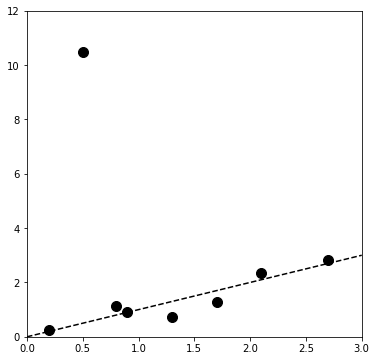

In [26]:
f = lambda x: (x)
x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
x = np.array([.2, .5, .8, .9, 1.3, 1.7, 2.1, 2.7])
y = f(x) + np.random.randn(len(x))/5
y[1]=y[1]+10
plt.figure(figsize=(6,6));
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k');
plt.plot(x, y, 'ok', ms=10);
plt.show()

In [18]:
fun = partial(compute_error, xy=(x,y))
fun_abs = partial(compute_error_abs, xy=(x,y))
res = optimize.fmin_cg(fun, x0=(0, 0))
res_abs = optimize.fmin_cg(fun_abs, x0=(0, 0))
print(res, res_abs)
print(fun(res), fun_abs(res_abs))

Optimization terminated successfully.
         Current function value: 73.873116
         Iterations: 3
         Function evaluations: 18
         Gradient evaluations: 6
         Current function value: 10.983429
         Iterations: 1
         Function evaluations: 234
         Gradient evaluations: 76
[-0.6301034   3.43869736] [0.71469332 0.56054378]
73.87311642055046 10.983428531172692


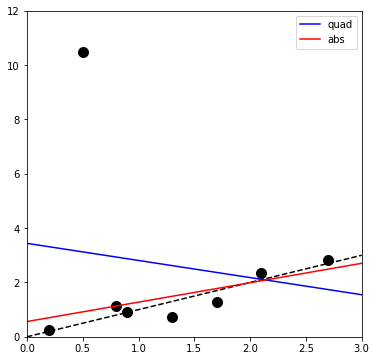

In [31]:
def lin(a, b):
    return lambda x: a*x + b

f_quad = lin(*res)
f_abs  = lin(*res_abs)

x_tr = np.linspace(0., 3, 200)
y_tr = f(x_tr)
plt.figure(figsize=(6,6))
axes = plt.gca()
axes.set_xlim([0,3])
axes.set_ylim([0,12])
plt.plot(x_tr, y_tr, '--k')
plt.plot(x, y, 'ok', ms=10);
plt.plot(x_tr, f_quad(x_tr), color='blue', label='quad')
plt.plot(x_tr, f_abs(x_tr), color='red', label='abs')
plt.legend()
plt.show()